# Wavelet Transform


*   Discrete Wavelet Transform (DWT)
*   Continuous Wavelet Transform (CWT)
*   Fast Wavelet Transform (FWT)


In [1]:
# Install library PyWavelets jika belum terinstall
!pip install pywavelets                 # Menginstall PyWavelets melalui pip di Google Colab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.9 MB/s eta 0:00:00


In [2]:
# Impor library yang diperlukan
import cv2                               # Library OpenCV untuk pengolahan citra digital
import numpy as np                       # Library NumPy untuk operasi numerik dan manipulasi array
import matplotlib.pyplot as plt          # Library Matplotlib untuk visualisasi gambar
from google.colab import files           # Modul untuk mengunggah file di Google Colab
import pywt                              # Library PyWavelets untuk transformasi wavelet

In [3]:
# Mengunggah gambar dari lokal
print("Unggah gambar yang ingin diproses (format .jpg, .png, dll.)")  # Menampilkan pesan untuk meminta pengguna mengunggah gambar
uploaded = files.upload()                # Mengunggah gambar dan menyimpan hasilnya dalam variabel uploaded (dictionary)

Unggah gambar yang ingin diproses (format .jpg, .png, dll.)


Saving lena 2.0.jpg to lena 2.0.jpg


In [4]:
# Memuat gambar yang diunggah
filename = next(iter(uploaded))          # Mengambil nama file pertama dari dictionary uploaded
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)  # Memuat gambar dalam mode Grayscale untuk mempermudah transformasi

In [5]:
# 1. Discrete Wavelet Transform (DWT)
coeffs2 = pywt.dwt2(image, 'haar')       # Menerapkan DWT 2D menggunakan wavelet Haar
cA, (cH, cV, cD) = coeffs2               # Mendapatkan koefisien aproksimasi (cA) dan detail (cH, cV, cD)
dwt_image = cA                           # Menggunakan koefisien aproksimasi untuk visualisasi

In [6]:
# 2. Continuous Wavelet Transform (CWT) - pada baris tengah gambar
row = image[image.shape[0]//2, :]        # Mengambil baris tengah gambar sebagai sinyal 1D
scales = np.arange(1, min(128, len(row)//2))  # Menentukan skala untuk CWT, dibatasi agar sesuai dengan panjang sinyal
coeffs_cwt, freqs = pywt.cwt(row, scales, 'mexh')  # Menerapkan CWT pada baris tengah dengan wavelet Mexican Hat
cwt_image = np.abs(coeffs_cwt)           # Mengambil magnitude CWT untuk visualisasi scalogram

In [7]:
# 3. Fast Wavelet Transform (FWT) - diimplementasikan sebagai DWT multi-level
coeffs_fwt = pywt.wavedec2(image, 'haar', level=2)  # Menerapkan DWT multi-level (level 2) menggunakan wavelet Haar
fwt_image = coeffs_fwt[0]                # Menggunakan koefisien aproksimasi dari level 2 untuk visualisasi

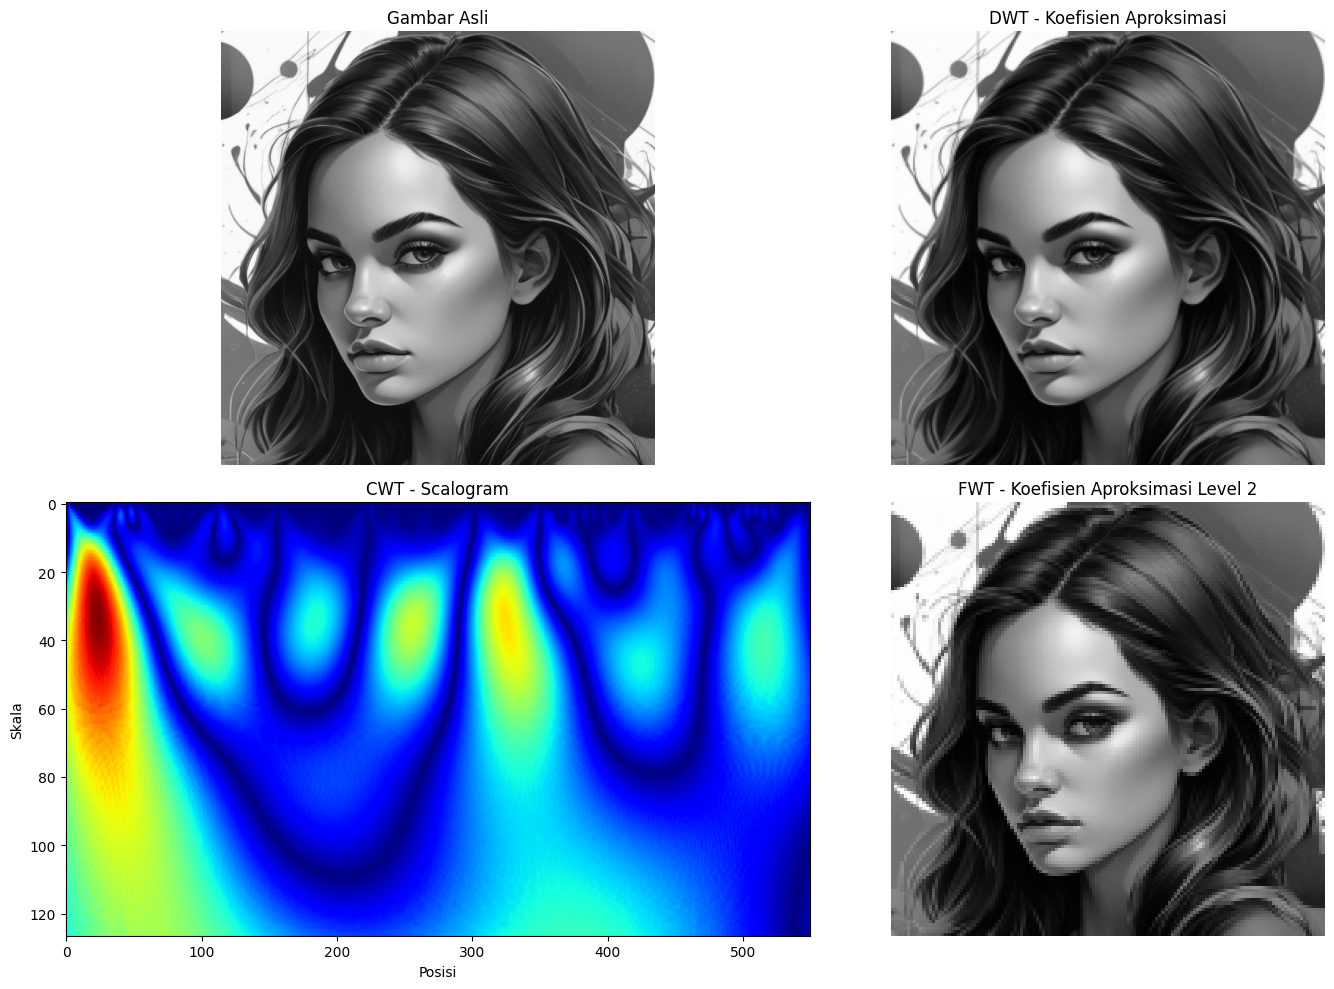

In [8]:
# Menampilkan hasil dalam satu frame
plt.figure(figsize=(15, 10))             # Membuat figure dengan ukuran 15x10 inci untuk menampung empat subplot

# Gambar Asli
plt.subplot(2, 2, 1)                     # Membuat subplot pada posisi 1 (baris 2, kolom 2, indeks 1)
plt.imshow(image, cmap='gray')           # Menampilkan gambar asli dalam skala abu-abu
plt.title('Gambar Asli')                 # Memberi judul pada subplot
plt.axis('off')                          # Menghilangkan sumbu untuk tampilan yang lebih bersih

# Hasil DWT (koefisien aproksimasi)
plt.subplot(2, 2, 2)                     # Membuat subplot pada posisi 2
plt.imshow(dwt_image, cmap='gray')       # Menampilkan koefisien aproksimasi DWT
plt.title('DWT - Koefisien Aproksimasi') # Memberi judul pada subplot
plt.axis('off')                          # Menghilangkan sumbu

# Hasil CWT (scalogram)
plt.subplot(2, 2, 3)                     # Membuat subplot pada posisi 3
plt.imshow(cwt_image, aspect='auto', cmap='jet')  # Menampilkan scalogram CWT dengan aspek otomatis dan colormap jet
plt.title('CWT - Scalogram')             # Memberi judul pada subplot
plt.xlabel('Posisi')                     # Label sumbu x untuk menunjukkan posisi pada sinyal
plt.ylabel('Skala')                      # Label sumbu y untuk menunjukkan skala wavelet

# Hasil FWT (koefisien aproksimasi level 2)
plt.subplot(2, 2, 4)                     # Membuat subplot pada posisi 4
plt.imshow(fwt_image, cmap='gray')       # Menampilkan koefisien aproksimasi dari FWT level 2
plt.title('FWT - Koefisien Aproksimasi Level 2')  # Memberi judul pada subplot
plt.axis('off')                          # Menghilangkan sumbu

plt.tight_layout()                       # Mengatur layout agar subplot tidak saling tumpang tindih
plt.show()                               # Menampilkan semua subplot dalam satu frame